# Learning From Data Final

https://work.caltech.edu/homework/final.pdf

Python imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Nonlinear transforms

# 1

$\mathcal X \in \mathbb R^2$

$z$ is a linear combination of $(1, x_1, x_2, x_1x_2, x_1^2, x_2^2, \cdots, x_1^Q, x_2^Q)$.

In [2]:
from scipy.special import binom
# We have 1, x_1, x_2.
# How many ways are there to choose Q items?

Q = 10
total = 0
for a in range(0, Q+1):
    for b in range(0, Q+1):
        for c in range(0, Q+1):
            if b == 0 and c == 0:
                continue
            if a+b+c == Q:
                total += 1
                
total

65

In [3]:
total = 0
for a in range(0, Q+1):
    for b in range(0, Q+1):
        if a + b <= 10 and a + b > 0:
            total += 1
            
total

65

In [4]:
import sympy as sp
sp.expand(sp.sympify("1 + x + y")**10).__str__().count("+")

65

According to "stars and bars", this can be interpeted as the number of permutations of the string `**********||`. I.e. number of different ways to divide 10 numbers in 3 categories.

We subtract 1 to account for the case where all the stars were put in the box corresponding to "1".


In [5]:
Q = 10
d = 2
binom(Q + d, Q) - 1

65.0

**Answer: Alternative 1E, none of the above -- 65**

# Bias and Variance

# 2

$\bar g$ is expected value of $g^{(\mathcal D)}$ over all data sets $\mathcal D$. 

When can $\bar g \notin \mathcal H$?

a: All g's would be the same, and all of them in H.  
b: g would still be in H.  
c: g would still be in H.  
d: g would still be in H.  
e: Must be correct. It is nonsense that the expected value of something in H can be outside H.  

<p style="color:red;"><b>Answer: Alternative 2E, none of the above.</b></p>

---

Wrong. See explanation here: http://book.caltech.edu/bookforum/showthread.php?t=4624

The expected hypothesis is computed by taking an average of hypotheses. That is, e.g. (h1+h2)/2.

Let A be a bad nondeterministic algorithm that always returns either h1 or h2 with equal probability.

A logistic model is of the form $h(x) = \theta(w^T x)$ where $\theta(s) = \frac{e^s}{1+e^s} = \frac{1}{1 + e^{-s}}$

Can we think of a case where the sum of two logistic hypotheses $h_1$ and $h_2$ cannot be written as $\theta(s)$?

Indeed, imagine if h1 always has weights (0, 1) and h2 always has weights (0, -2).
The expected model does not have weights (0, -0.5). It is not even a logistic model. See  the following plot

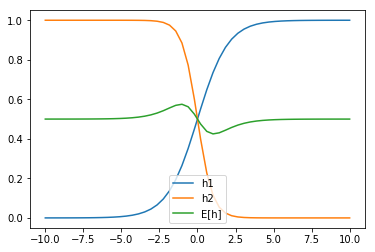

In [6]:

def theta(s):
    return 1 / (1 + np.exp(-s))

def h1(x0, x1):
    w0 = 0
    w1 = 1
    return theta(w0 * x0 + w1 * x1)

def h2(x0, x1):
    w0 = 0
    w1 = -2
    return theta(w0 * x0 + w1 * x1)

xx = np.linspace(-10, 10)
plt.plot(xx, h1(1, xx))
plt.plot(xx, h2(1, xx))
plt.plot(xx, 1/2 * (h1(1, xx) + h2(1, xx)))
plt.legend(["h1", "h2", "E[h]"])
plt.show()

$h_3(x)$ is clearly not a logistic function.

# Overfitting

# 3

Overfitting means fitting the data more than warranted. I.e. choosing a too complex model for the amount of data. Fitting to the noise.

a: If there is overfitting, there must be two or more hypotheses that have different values of E_in. -- True. We have chosen a too complex model that fits the input data too well, and in order to do that we had to compare multiple models.

b: If there is overfitting, there must be two or more hypotheses that have different values of E_out. -- True. If all hypotheses were equally good, we cannot really call this overfitting.

c: If there is overfitting, there must be two or more hypotheses that have different values of (E_out - E_in). -- ???

d: We can always determine if there is overfitting by comparing the values of E_out - E_in. -- ???

e: We cannot determine overfitting based on one hypothesis only. -- True.

# 4

Deterministic noise is the error due to complexity in the target function that our model cannot approximate.

Thus deterministic noise depends on our hypothesis set.

**Answer: Alternative 4D: Stochastic noise does not depend on the hypothesis set.**

# 5

The least squares linear regression solution satisfies the constraint. Thus the regularization has no effect, and w_reg = w_lin.

**Answer: Alternative A**

# 6

**Answer: Alternative B -- soft-order constraints can be translated into augmented error**

# 7

In [7]:
data_train = np.loadtxt("features.train")
data_test = np.loadtxt("features.test")
y_train, X_train = data_train[:, :1], data_train[:, 1:]
y_test, X_test = data_test[:, :1], data_test[:, 1:]


Since I already implemented regularized least squares regression in the previous homework, I will use sklearn here.

> from sklearn.linear_model import Ridge  
Minimizes the objective function:  
||y - Xw||^2_2 + alpha * ||w||^2_2

In [8]:
from sklearn.linear_model import RidgeClassifier

def get_n_vs_m_dataset(ns, ms, which):
    if which == "train":
        data = data_train.copy()
    elif which == "test":
        data = data_test.copy()
    else:
        1/0
    in_ns = np.isin(data[:,0], ns)
    in_ms = np.isin(data[:,0], ms)
    in_either = np.logical_or(in_ns, in_ms)
    data[in_ns,0] = +1.0
    data[in_ms,0] = -1.0
    X, y = data[in_either,1:], data[in_either,0]
    return np.hstack([np.ones([X.shape[0], 1]), X]), y
    
X, y = get_n_vs_m_dataset([5], [0, 1, 2, 3, 4, 6, 7, 8, 9], "train")


def plot(X, y, s=1):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2], s)
    plt.scatter(X[above,1], X[above,2], s)
    plt.legend(["ms", "ns"])
    plt.xlabel("Intensity")
    plt.ylabel("Symmetry")

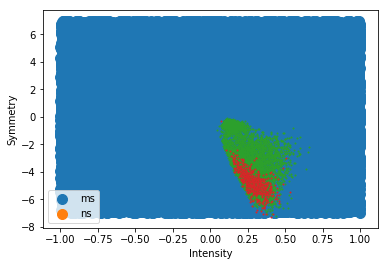

0.07625840076807022


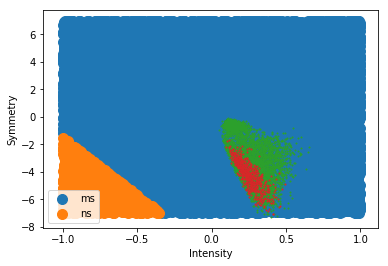

0.09107118365107666


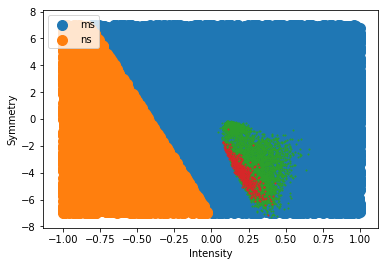

0.08846523110684405


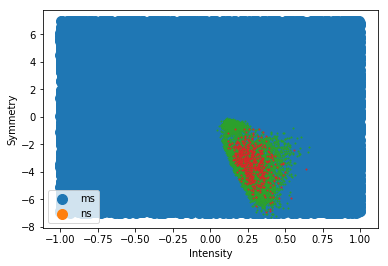

0.07433822520916199


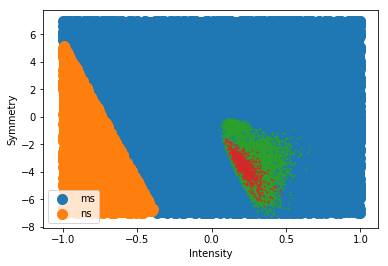

0.08832807570977919


In [9]:
def plot_decision_boundary(clf):
    N = 30000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 2*np.random.rand(N) - 1
    X[:,2] = np.random.rand(N)*(-14) + 7
    y = clf.predict(X)
    plot(X, y, s=100)

def in_sample_error(ns, ms):
    X, y = get_n_vs_m_dataset(ns, ms, "train")
    Z = X # = (1, x1, x2)
    clf = RidgeClassifier(alpha=1.0, fit_intercept=False)
    clf.fit(Z, y)
    plot_decision_boundary(clf)
    plot(X, y)
    plt.show()
    return np.mean(clf.predict(Z) != y)
    
print(in_sample_error([5], [0, 1, 2, 3, 4, 6, 7, 8, 9]))
print(in_sample_error([6], [0, 1, 2, 3, 4, 5, 7, 8, 9]))
print(in_sample_error([7], [0, 1, 2, 3, 4, 5, 6, 8, 9]))
print(in_sample_error([8], [0, 1, 2, 3, 4, 5, 6, 7, 9]))
print(in_sample_error([9], [0, 1, 2, 3, 4, 5, 6, 7, 8]))

All the classifiers are horrible, but 8 vs all has the lowest E_in.
This is since the training the estimator always guesses -1, and this one coincidentally has fewer of that that class compared to other numbers.

**Alternative 7D: 8 vs all**

# 8

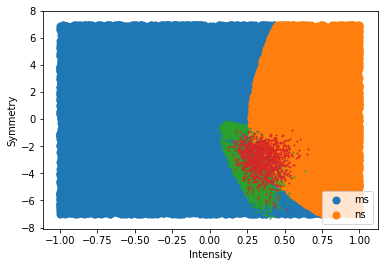

0 vs all Eout 0.10662680617837568


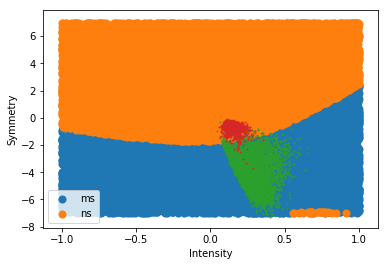

1 vs all Eout 0.02192326856003986


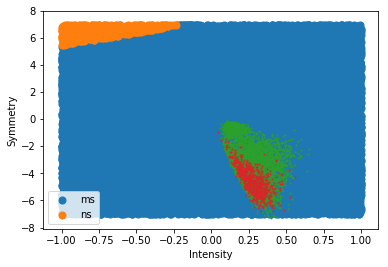

2 vs all Eout 0.09865470852017937


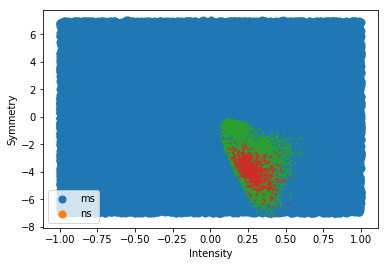

3 vs all Eout 0.08271051320378675


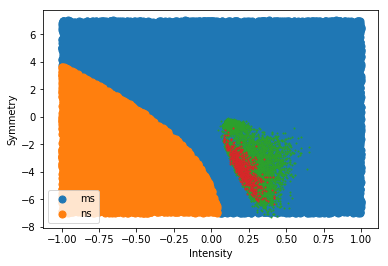

4 vs all Eout 0.09965122072745392


In [10]:
def plot_decision_boundary2(clf, phi):
    N = 30000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 2*np.random.rand(N) - 1
    X[:,2] = np.random.rand(N)*(-14) + 7
    y = clf.predict(phi(X))
    plot(X, y, s=50)

def phi(X):
    Z = np.zeros((X.shape[0], 6))
    Z[:,0] = 1
    Z[:,1] = X[:,1]
    Z[:,2] = X[:,2]
    Z[:,3] = X[:,1]*X[:,2]
    Z[:,4] = X[:,1]**2
    Z[:,5] = X[:,2]**2
    return Z

def out_of_sample_error(ns, ms):
    X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
    X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")
    
    Z_train = phi(X_train)
    Z_test = phi(X_test)

    clf = RidgeClassifier(alpha=1, fit_intercept=False)
    clf.fit(Z_train, y_train)
    plot_decision_boundary2(clf, phi)
    plot(X_train, y_train)
    plt.show()
    return np.mean(clf.predict(Z_test) != y_test)
    
print("0 vs all Eout", out_of_sample_error([0], [1, 2, 3, 4, 5, 6, 7, 8, 9]))
print("1 vs all Eout", out_of_sample_error([1], [0, 2, 3, 4, 5, 6, 7, 8, 9]))
print("2 vs all Eout", out_of_sample_error([2], [0, 1, 3, 4, 5, 6, 7, 8, 9]))
print("3 vs all Eout", out_of_sample_error([3], [0, 1, 2, 4, 5, 6, 7, 8, 9]))
print("4 vs all Eout", out_of_sample_error([4], [0, 1, 2, 3, 5, 6, 7, 8, 9]))

A little gotcha here: The intercept is not penalized for sklearn's Ridge method when using fit_intercept=True.
So instead add a ones column and set fit_intercept=False to get the desired behavior of also penalizing the intercept term w0.

**Alternative 8B: 1 vs all has the lowest E_out**

# 9

In [11]:
def check_all(ns, ms):
    print("{} vs all".format(ns[0]))
    X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
    X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")
    
    Z_train = phi(X_train)
    Z_test = phi(X_test)
    
    clf = RidgeClassifier(alpha=1, fit_intercept=False)

    # No transform E_in
    clf.fit(X_train, y_train)
    print("  No transform E_in\t", np.mean(clf.predict(X_train) != y_train))
    # No transform E_out
    print("  No transform E_out\t", np.mean(clf.predict(X_test) != y_test))
    # Transform E_in
    clf.fit(Z_train, y_train)
    print("     Transform E_in\t", np.mean(clf.predict(Z_train) != y_train))
    # Transform E_out
    print("     Transform E_out\t", np.mean(clf.predict(Z_test) != y_test))

check_all([1], [0, 2, 3, 4, 5, 6, 7, 8, 9])
check_all([2], [0, 1, 3, 4, 5, 6, 7, 8, 9])
check_all([3], [0, 1, 2, 4, 5, 6, 7, 8, 9])
check_all([4], [0, 1, 2, 3, 5, 6, 7, 8, 9])
check_all([5], [0, 1, 2, 3, 4, 6, 7, 8, 9])
check_all([6], [0, 1, 2, 3, 4, 5, 7, 8, 9])
check_all([7], [0, 1, 2, 3, 4, 5, 6, 8, 9])
check_all([8], [0, 1, 2, 3, 4, 5, 6, 7, 9])
check_all([9], [0, 1, 2, 3, 4, 5, 6, 7, 8])

1 vs all
  No transform E_in	 0.01522424907420107
  No transform E_out	 0.02242152466367713
     Transform E_in	 0.012343985735838706
     Transform E_out	 0.02192326856003986
2 vs all
  No transform E_in	 0.10026059525442327
  No transform E_out	 0.09865470852017937
     Transform E_in	 0.10026059525442327
     Transform E_out	 0.09865470852017937
3 vs all
  No transform E_in	 0.09024825126868742
  No transform E_out	 0.08271051320378675
     Transform E_in	 0.09024825126868742
     Transform E_out	 0.08271051320378675
4 vs all
  No transform E_in	 0.08942531888629818
  No transform E_out	 0.09965122072745392
     Transform E_in	 0.08942531888629818
     Transform E_out	 0.09965122072745392
5 vs all
  No transform E_in	 0.07625840076807022
  No transform E_out	 0.07972097658196313
     Transform E_in	 0.07625840076807022
     Transform E_out	 0.07922272047832586
6 vs all
  No transform E_in	 0.09107118365107666
  No transform E_out	 0.08470353761833582
     Transform E_in	 0.091071183

a: False. Doesn't look like overfitting to me.  
b: False: No, transform doesn't improve E_out  
c: False: There is a slight difference in out of sample performance. E.g. 5 vs all is _slightly_ better.  
d: False: The transform sometimes sometimes has the same out of sample performance.  
e: True: The performance is improved, but only by a small percentage.

In [12]:
five_vs_all_improvement_percentage = -(0.07922272047832586 - 0.07972097658196313)/0.07972097658196313
print(five_vs_all_improvement_percentage)

0.0062499999999999795


**Alternative 9E**


# 10

1 vs 5
lambda=1
     Transform E_in	 0.005124919923126201
     Transform E_out	 0.025943396226415096


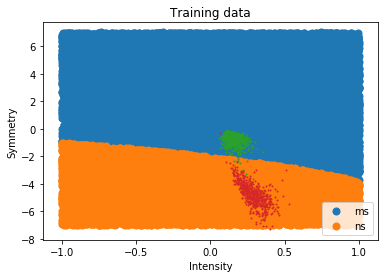

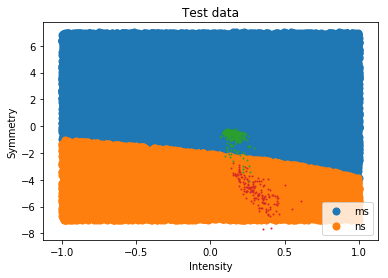

lambda=0.01
     Transform E_in	 0.004484304932735426
     Transform E_out	 0.02830188679245283


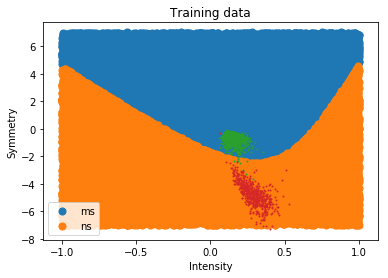

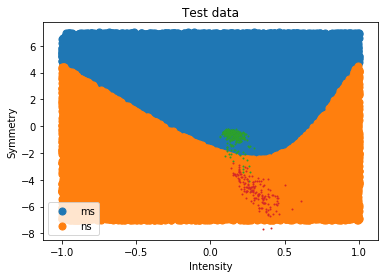

In [13]:
ns = [5]
ms = [1]
print("1 vs 5")

X_train, y_train = get_n_vs_m_dataset(ns, ms, "train")
X_test, y_test = get_n_vs_m_dataset(ns, ms, "test")

Z_train = phi(X_train)
Z_test = phi(X_test)


#########################################################################

print("lambda=1")
clf = RidgeClassifier(alpha=1, fit_intercept=False)

# Transform E_in
clf.fit(Z_train, y_train)
print("     Transform E_in\t", np.mean(clf.predict(Z_train) != y_train))
# Transform E_out
print("     Transform E_out\t", np.mean(clf.predict(Z_test) != y_test))


plot_decision_boundary2(clf, phi)
plot(X_train, y_train)
plt.title("Training data")
plt.show()

plot_decision_boundary2(clf, phi)
plot(X_test, y_test)
plt.title("Test data")
plt.show()

##############################################################################

print("lambda=0.01")
clf2 = RidgeClassifier(alpha=0.01, fit_intercept=False)

# Transform E_in
clf2.fit(Z_train, y_train)
print("     Transform E_in\t", np.mean(clf2.predict(Z_train) != y_train))
# Transform E_out
print("     Transform E_out\t", np.mean(clf2.predict(Z_test) != y_test))

plot_decision_boundary2(clf2, phi)
plot(X_train, y_train)
plt.title("Training data")
plt.show()

plot_decision_boundary2(clf2, phi)
plot(X_test, y_test)
plt.title("Test data")
plt.show()

Another gotcha: RidgeRegression in sklearn doesn't work properly with solver="lsqr"?

Anyways looks like we have overfitting, since E_in goes slightly down and E_out goes slightly up.

**Alternative 10A: Overfitting occurs**

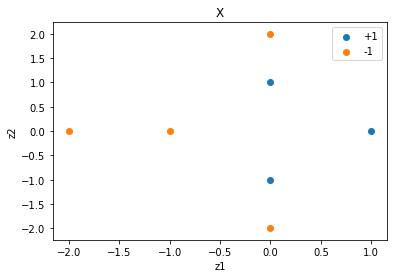

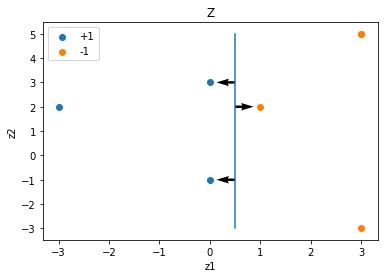

In [14]:
X = np.array([
    [1,1,0],
    [1,0,1],
    [1,0,-1],
    [1,-1,0],
    [1,0,2],
    [1,0,-2],
    [1,-2,0],
])

y = np.array([-1, -1, -1, +1, +1, +1, +1])

def phi(X):
    Z = np.zeros((X.shape[0], 3))
    Z[:,0] = 1
    Z[:,1] = X[:,2]**2 - 2*X[:,1] - 1
    Z[:,2] = X[:,1]**2 - 2*X[:,2] + 1
    return Z

def plot(X, y):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2])
    plt.scatter(X[above,1], X[above,2])
    plt.legend(["+1", "-1"])
    plt.xlabel("z1")
    plt.ylabel("z2")

plt.title("X")
plot(X, y)
plt.show()

Z = phi(X)

plt.title("Z")
plot(Z, y)
# Draw decision boundary and support vectors
plt.plot([0.5, 0.5], [-3, 5])
svec_UV = np.array([[-0.5, 0], [0.5, 0], [-0.5, 0]])
svec_XY = np.array([[0.5, 3], [0.5, 2], [0.5, -1]])
plt.quiver(svec_XY[:,0], svec_XY[:,1], svec_UV[:,0], svec_UV[:,1])
plt.show()

By looking at the scatter plot it is obvious where to put the decision plane, and where the support vectors are.

(i) $$ \mathbf w^T \mathbf z + b = 0 $$

 $$ w_1 z_1 + w_2 z_2 + b = 0 $$

Also, for each support vector $\mathbf x_k$, we also have that:

$$ w_1 x_1 + w_2 x_2 + b = 1 $$

for class (+1) support vectors and (ii)

$$ w_1 x_1 + w_2 x_2 + b = -1 $$

for class (-1) support vectors.

Let's try:

In [15]:
w1 = -2
w2 = 0
b = 1

# Decision boundary
print("wTz + b = 0 on decision boundary")
z1, z2 = 0.5, 10
print(w1*z1 + w2*z2 + b)

# Positive class
print("w1z1 + w2z2 + b = 1 for positive class")
z1, z2 = 0, 10
print(w1*z1 + w2*z2 + b)

# Negative class
print("w1z1 + w2z2 + b = -1 for negative class")
z1, z2 = 1, 10
print(w1*z1 + w2*z2 + b)

wTz + b = 0 on decision boundary
0.0
w1z1 + w2z2 + b = 1 for positive class
1
w1z1 + w2z2 + b = -1 for negative class
-1


The alternatives don't seem to match up with my findings here, regarding the scaling of w and b, and the direction of the plane.

Some planes that are also valid, but perhaps pointing in the wrong direction or having the wrong slope (but are still maximizing the margin in Z space) are:

(w1=-1, w2=0, b=0.5)   
(w1=1, w2=0, b=-0.5)   <-- **Alternative 11C**

# 12

In [16]:
print(X.shape)

(7, 3)


In [17]:
from sklearn.svm import SVC
print("X", X[:, 0:])
clf = SVC(C=5e9, kernel="poly", degree=2, gamma=1.0, verbose=True)
clf.fit(X[:,0:], y)
print("Support vectors", clf.support_vectors_)
print("Alphas", clf.dual_coef_)

X [[ 1  1  0]
 [ 1  0  1]
 [ 1  0 -1]
 [ 1 -1  0]
 [ 1  0  2]
 [ 1  0 -2]
 [ 1 -2  0]]
[LibSVM]Support vectors [[ 1.  0.  1.]
 [ 1.  0. -1.]
 [ 1. -1.  0.]
 [ 1.  0.  2.]
 [ 1.  0. -2.]]
Alphas [[-0.59647182 -0.81065085  0.8887034   0.20566488  0.31275439]]


In [18]:
print(clf.predict(X[:,0:]))
print(y)

[-1 -1 -1  1  1  1  1]
[-1 -1 -1  1  1  1  1]


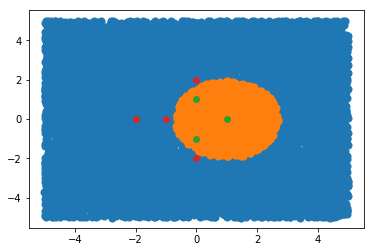

In [19]:
def plot_decision_boundary(clf):
    N = 10000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 10*np.random.rand(N) - 5
    X[:,2] = 10*np.random.rand(N) - 5
    y = clf.predict(X)
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[above,1], X[above,2], s=50)
    plt.scatter(X[below,1], X[below,2], s=50)
    
    
plot_decision_boundary(clf)
above = np.where(y > 0)
below = np.where(y < 0)
plt.scatter(X[below,1], X[below,2])
plt.scatter(X[above,1], X[above,2])
plt.show()


Gotcha here: The ones column should be included to produce correct results. I.e. x0=1 in addition to x1 and x2.

There are 5 support vectors.

**Alternative 12C (4-5)**

# Radial Basis Functions

# 13

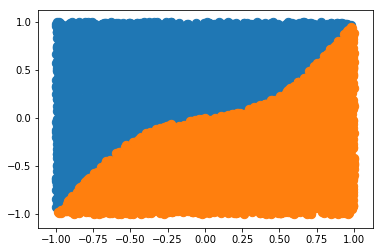

[LibSVM]

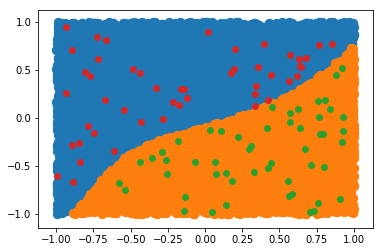

In [90]:
def plot_decision_boundary(f):
    N = 10000
    X = np.zeros((N,3))
    X[:,0] = 1
    X[:,1] = 2*np.random.rand(N) - 1
    X[:,2] = 2*np.random.rand(N) - 1
    y = f(X)
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[above,1], X[above,2], s=70)
    plt.scatter(X[below,1], X[below,2], s=70)
    
def plot_data(X, y, s=None):
    above = np.where(y > 0)
    below = np.where(y < 0)
    plt.scatter(X[below,1], X[below,2], s=s)
    plt.scatter(X[above,1], X[above,2], s=s)

def f(X):
    return np.sign(X[:,2] - X[:,1] + 0.25 * np.sin(np.pi * X[:,1]))

X = 2*np.random.rand(100, 3)-1
X[:,0] = 1
y = f(X)
plot_decision_boundary(f)
plt.show()

svc = SVC(C=1e5, kernel="rbf", gamma=1.5, verbose=True)
svc.fit(X, y)
plot_decision_boundary(svc.predict)
plot_data(X, y)

plt.show()


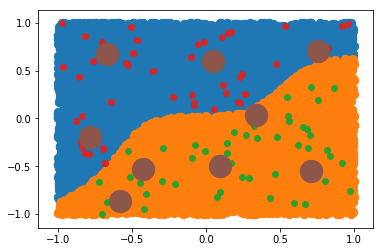

In [155]:
def kmeans(X, K):
    while True:
        try:
            mus = 2*np.random.rand(K, 2)-1
            cluster_idx = np.zeros(X.shape[0])
            # Repeat 100 times
            for it in range(100):
                # Find closest cluster for each point
                for i in range(X.shape[0]):
                    cluster_idx[i] = np.argmin(np.linalg.norm(mus - X[i,1:], axis=1))
                # Find average position for each cluster
                for k in range(K):
                    Xk = X[np.where(cluster_idx == k),1:].squeeze()
                    if Xk.shape[0] == 0:
                        raise StopIteration
                    mus[k,:] = np.mean(Xk, axis=0)

            # Check that no centroids are empty
            per_centroid = np.zeros(K)
            for i in range(X.shape[0]):
                cluster_idx[i] = np.argmin(np.linalg.norm(mus - X[i,1:], axis=1))
            for k in range(K):
                per_centroid = np.sum(cluster_idx == k)
            if np.any(per_centroid == 0):
                continue
            return mus
        except StopIteration as e:
            pass # A cluster was empty -- try again
        
K = 9
plot_decision_boundary(svc.predict)
plot_data(X, y)
plot_data(np.hstack([np.ones([K,1]), kmeans(X, K)]), np.ones(K), s=500)
plt.show()


Check how many times we get a non-separable dataset.

In [120]:
for i in range(10000):
    X = 2*np.random.rand(100, 3)-1
    X[:,0] = 1
    y = f(X)
    svc = SVC(C=1e8, kernel="rbf", gamma=1.5, verbose=False)
    svc.fit(X, y)
    E_in = np.mean(svc.predict(X) != y)
    if E_in > 0:
        print("oh no")


Less than 0.1% of the time.

**Alternative 13A**

# 14 (Regular RBF with pseudo inverse)

SVC: 0.0/0.023,  RBF: 0.05/0.074
100.0 %
SVC: 0.0/0.045,  RBF: 0.02/0.067
100.0 %
SVC: 0.0/0.016,  RBF: 0.05/0.065
100.0 %
SVC: 0.0/0.029,  RBF: 0.04/0.067
100.0 %
SVC: 0.0/0.015,  RBF: 0.06/0.065
100.0 %
SVC: 0.0/0.047,  RBF: 0.04/0.04
83.33333333333334 %
SVC: 0.0/0.022,  RBF: 0.04/0.057
85.71428571428571 %
SVC: 0.0/0.029,  RBF: 0.05/0.05
87.5 %
SVC: 0.0/0.01,  RBF: 0.02/0.023
88.88888888888889 %
SVC: 0.0/0.033,  RBF: 0.06/0.057
90.0 %
SVC: 0.0/0.062,  RBF: 0.05/0.077
90.9090909090909 %
SVC: 0.0/0.015,  RBF: 0.04/0.073
91.66666666666666 %
SVC: 0.0/0.037,  RBF: 0.03/0.096
92.3076923076923 %
SVC: 0.0/0.056,  RBF: 0.03/0.076
92.85714285714286 %
SVC: 0.0/0.017,  RBF: 0.02/0.031
93.33333333333333 %
SVC: 0.0/0.021,  RBF: 0.03/0.062
93.75 %
SVC: 0.0/0.033,  RBF: 0.04/0.069
94.11764705882352 %
SVC: 0.0/0.039,  RBF: 0.03/0.073
94.44444444444444 %
SVC: 0.0/0.04,  RBF: 0.06/0.04
89.47368421052632 %
SVC: 0.0/0.029,  RBF: 0.05/0.051
90.0 %
SVC: 0.0/0.035,  RBF: 0.04/0.055
90.47619047619048 %
SVC: 

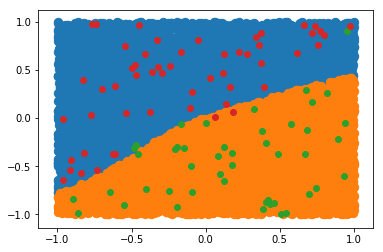

In [159]:
class RegularRBF:
    def __init__(self, K, gamma):
        self.K = K
        self.gamma = gamma
    
    def create_phi_matrix(self, X):
        self.centers = kmeans(X, self.K)
        phi = np.zeros((X.shape[0], self.K+1)) # +1 for bias term
        for k in range(self.K):
            dists_to_center = (X[:,1] - self.centers[k,0])**2 + (X[:,2] - self.centers[k,1])**2
            phi[:,k+1] = dists_to_center
        phi = np.exp(-self.gamma * phi)
        phi[:,0] = 1 # For bias term
        return phi
    
    def fit(self, X, y):
        phi = self.create_phi_matrix(X)
        self.w = np.linalg.lstsq(phi, y, rcond=None)[0]
    
    def predict(self, X):
        # sign ( sum_k wk exp(-gamma*||x - muk||^2) + b)
        S = np.zeros(X.shape[0]) # One row for each test point
        for k in range(self.K):
            dists = np.linalg.norm(X[:,1:] - self.centers[k,:], axis=1)**2 # to center_k
            S += self.w[k+1]*np.exp(-self.gamma*dists)
        return np.sign(S+self.w[0]) # add bias term

total_wins = 0
kernel_wins = 0

for i in range(100):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(1000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    svc = SVC(C=1e8, kernel="rbf", gamma=1.5, verbose=False)
    svc.fit(X_train, y_train)
    svc_E_in = np.mean(svc.predict(X_train) != y_train)
    svc_E_out = np.mean(svc.predict(X_test) != y_test)

    
    rbf = RegularRBF(K=9, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)        
    rbf_E_out = np.mean(rbf.predict(X_test) != y_test)
    
    print("SVC: {}/{},  RBF: {}/{}".format(
        svc_E_in, svc_E_out,
        rbf_E_in, rbf_E_out,
    ))
    
    total_wins += 1
    if svc_E_out < rbf_E_out:
        kernel_wins += 1
    print(kernel_wins / total_wins * 100, "%")


rbf = RegularRBF(K=9, gamma=1.5)
rbf.fit(X, y)
rbf.predict(X)

plot_decision_boundary(rbf.predict)
plot_data(X, y)
plt.show()

Looks like kernel version wins around 84% of the time for K=9 and gamma=1.5 in terms of E_out.

**Alternative 14E**

# 15

K=12, gamma=1.5

In [162]:

total_wins = 0
kernel_wins = 0

for i in range(1000):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(10000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    svc = SVC(C=1e8, kernel="rbf", gamma=1.5, verbose=False)
    svc.fit(X_train, y_train)
    svc_E_in = np.mean(svc.predict(X_train) != y_train)
    svc_E_out = np.mean(svc.predict(X_test) != y_test)

    
    rbf = RegularRBF(K=9, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)        
    rbf_E_out = np.mean(rbf.predict(X_test) != y_test)
    
    print("SVC: {}/{},  RBF: {}/{}".format(
        svc_E_in, svc_E_out,
        rbf_E_in, rbf_E_out,
    ))
    
    total_wins += 1
    if svc_E_out < rbf_E_out:
        kernel_wins += 1
    print(kernel_wins / total_wins * 100, "%")


rbf = RegularRBF(K=12, gamma=1.5)
rbf.fit(X, y)
rbf.predict(X)

plot_decision_boundary(rbf.predict)
plot_data(X, y)
plt.show()

SVC: 0.0/0.0185,  RBF: 0.05/0.0691
100.0 %
SVC: 0.0/0.0363,  RBF: 0.02/0.0288
50.0 %
SVC: 0.0/0.0222,  RBF: 0.02/0.0708
66.66666666666666 %
SVC: 0.0/0.0444,  RBF: 0.02/0.0684
75.0 %
SVC: 0.0/0.0393,  RBF: 0.09/0.0977
80.0 %
SVC: 0.0/0.0298,  RBF: 0.02/0.0329
83.33333333333334 %
SVC: 0.0/0.0637,  RBF: 0.0/0.041
71.42857142857143 %
SVC: 0.0/0.0339,  RBF: 0.04/0.0349
75.0 %
SVC: 0.0/0.0251,  RBF: 0.04/0.0773
77.77777777777779 %
SVC: 0.0/0.022,  RBF: 0.01/0.0256
80.0 %
SVC: 0.0/0.0238,  RBF: 0.03/0.0575
81.81818181818183 %
SVC: 0.0/0.0438,  RBF: 0.05/0.0529
83.33333333333334 %
SVC: 0.0/0.0266,  RBF: 0.03/0.0681
84.61538461538461 %
SVC: 0.0/0.0256,  RBF: 0.03/0.0396
85.71428571428571 %
SVC: 0.0/0.0217,  RBF: 0.0/0.0468
86.66666666666667 %
SVC: 0.0/0.0231,  RBF: 0.02/0.0393
87.5 %
SVC: 0.0/0.0114,  RBF: 0.06/0.0511
88.23529411764706 %
SVC: 0.0/0.0357,  RBF: 0.02/0.0521
88.88888888888889 %
SVC: 0.0/0.0368,  RBF: 0.04/0.0519
89.47368421052632 %
SVC: 0.0/0.0323,  RBF: 0.05/0.0782
90.0 %
SVC: 0.

SVC: 0.0/0.0682,  RBF: 0.02/0.0525
92.99363057324841 %
SVC: 0.0/0.0238,  RBF: 0.03/0.0498
93.0379746835443 %
SVC: 0.0/0.0346,  RBF: 0.01/0.0195
92.45283018867924 %
SVC: 0.0/0.033,  RBF: 0.04/0.0356
92.5 %
SVC: 0.0/0.0449,  RBF: 0.02/0.0548
92.54658385093167 %
SVC: 0.0/0.0395,  RBF: 0.01/0.0507
92.5925925925926 %
SVC: 0.0/0.0124,  RBF: 0.03/0.0458
92.63803680981594 %
SVC: 0.0/0.0459,  RBF: 0.04/0.0501
92.6829268292683 %
SVC: 0.0/0.0574,  RBF: 0.04/0.0786
92.72727272727272 %
SVC: 0.0/0.0167,  RBF: 0.03/0.0386
92.7710843373494 %
SVC: 0.0/0.0148,  RBF: 0.03/0.0498
92.81437125748504 %
SVC: 0.0/0.0455,  RBF: 0.01/0.0751
92.85714285714286 %
SVC: 0.0/0.0223,  RBF: 0.03/0.0488
92.89940828402366 %
SVC: 0.0/0.0215,  RBF: 0.02/0.0429
92.94117647058823 %
SVC: 0.0/0.042,  RBF: 0.0/0.0394
92.39766081871345 %
SVC: 0.0/0.0437,  RBF: 0.06/0.0562
92.44186046511628 %
SVC: 0.0/0.0505,  RBF: 0.02/0.0761
92.48554913294798 %
SVC: 0.0/0.0167,  RBF: 0.05/0.0376
92.52873563218391 %
SVC: 0.0/0.0403,  RBF: 0.02/0.

SVC: 0.0/0.04,  RBF: 0.07/0.071
93.52750809061489 %
SVC: 0.0/0.0376,  RBF: 0.04/0.0547
93.54838709677419 %
SVC: 0.0/0.0279,  RBF: 0.05/0.0793
93.56913183279742 %
SVC: 0.0/0.0154,  RBF: 0.02/0.0362
93.58974358974359 %
SVC: 0.0/0.0312,  RBF: 0.05/0.0761
93.61022364217251 %
SVC: 0.0/0.0226,  RBF: 0.0/0.0346
93.63057324840764 %
SVC: 0.0/0.0475,  RBF: 0.08/0.0662
93.65079365079364 %
SVC: 0.0/0.0195,  RBF: 0.06/0.0504
93.67088607594937 %
SVC: 0.0/0.0087,  RBF: 0.05/0.0486
93.69085173501577 %
SVC: 0.0/0.0195,  RBF: 0.08/0.0826
93.71069182389937 %
SVC: 0.0/0.0167,  RBF: 0.03/0.064
93.73040752351098 %
SVC: 0.0/0.0254,  RBF: 0.02/0.0609
93.75 %
SVC: 0.0/0.0313,  RBF: 0.03/0.0711
93.76947040498442 %
SVC: 0.0/0.0399,  RBF: 0.03/0.0538
93.7888198757764 %
SVC: 0.0/0.1001,  RBF: 0.03/0.0788
93.49845201238391 %
SVC: 0.0/0.031,  RBF: 0.0/0.0214
93.20987654320987 %
SVC: 0.0/0.0361,  RBF: 0.06/0.0858
93.23076923076923 %
SVC: 0.0/0.0219,  RBF: 0.05/0.0639
93.25153374233128 %
SVC: 0.0/0.0163,  RBF: 0.05/0.

SVC: 0.0/0.0341,  RBF: 0.07/0.061
91.1062906724512 %
SVC: 0.0/0.0286,  RBF: 0.04/0.0493
91.12554112554112 %
SVC: 0.0/0.0216,  RBF: 0.03/0.068
91.14470842332614 %
SVC: 0.0/0.022,  RBF: 0.02/0.0378
91.16379310344827 %
SVC: 0.0/0.0361,  RBF: 0.04/0.0712
91.18279569892474 %
SVC: 0.0/0.0255,  RBF: 0.04/0.0628
91.20171673819742 %
SVC: 0.0/0.0488,  RBF: 0.05/0.0881
91.22055674518201 %
SVC: 0.0/0.0173,  RBF: 0.06/0.0741
91.23931623931624 %
SVC: 0.0/0.0327,  RBF: 0.03/0.0414
91.25799573560768 %
SVC: 0.0/0.0338,  RBF: 0.04/0.0753
91.27659574468086 %
SVC: 0.0/0.0242,  RBF: 0.02/0.0563
91.29511677282377 %
SVC: 0.0/0.032,  RBF: 0.02/0.0553
91.3135593220339 %
SVC: 0.0/0.0223,  RBF: 0.02/0.0472
91.33192389006342 %
SVC: 0.0/0.0193,  RBF: 0.03/0.0513
91.35021097046413 %
SVC: 0.0/0.0292,  RBF: 0.02/0.0483
91.36842105263158 %
SVC: 0.0/0.0225,  RBF: 0.03/0.046
91.38655462184873 %
SVC: 0.0/0.0466,  RBF: 0.02/0.0723
91.40461215932913 %
SVC: 0.0/0.051,  RBF: 0.02/0.0803
91.42259414225941 %
SVC: 0.0/0.0245,  

KeyboardInterrupt: 

SVM with RBF kernel wins above 90% of the time.

**Alternative 15E**

# 16

Compare Ein, Eout for regular RBF with K=9 and K=12.

In [167]:
case_a = 0
case_b = 0
case_c = 0
case_d = 0
case_e = 0

for i in range(150):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(10000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    rbf9 = RegularRBF(K=9, gamma=1.5)
    rbf9.fit(X_train, y_train)
    rbf9_E_in = np.mean(rbf9.predict(X_train) != y_train)        
    rbf9_E_out = np.mean(rbf9.predict(X_test) != y_test)
    
    rbf12 = RegularRBF(K=12, gamma=1.5)
    rbf12.fit(X_train, y_train)
    rbf12_E_in = np.mean(rbf12.predict(X_train) != y_train)        
    rbf12_E_out = np.mean(rbf12.predict(X_test) != y_test)
    
    print("RBF9: {}/{},  RBF12: {}/{}".format(
        rbf9_E_in, rbf9_E_out,
        rbf12_E_in, rbf12_E_out,
    ))
    
    if rbf12_E_in < rbf9_E_in and rbf12_E_out > rbf9_E_out:
        case_a += 1
    if rbf12_E_in > rbf9_E_in and rbf12_E_out < rbf9_E_out:
        case_b += 1
    if rbf12_E_in > rbf9_E_in and rbf12_E_out > rbf9_E_out:
        case_c += 1
    if rbf12_E_in < rbf9_E_in and rbf12_E_out < rbf9_E_out:
        case_d += 1
    if rbf12_E_in == rbf9_E_in and rbf12_E_out == rbf9_E_out:
        case_e += 1
        
print(case_a)
print(case_b)
print(case_c)
print(case_d)
print(case_e)

RBF9: 0.01/0.0526,  RBF12: 0.0/0.0306
RBF9: 0.03/0.071,  RBF12: 0.03/0.0794
RBF9: 0.04/0.0583,  RBF12: 0.02/0.045
RBF9: 0.03/0.0372,  RBF12: 0.02/0.0173
RBF9: 0.03/0.0486,  RBF12: 0.02/0.0528
RBF9: 0.04/0.0552,  RBF12: 0.01/0.0357
RBF9: 0.06/0.085,  RBF12: 0.03/0.051
RBF9: 0.03/0.0542,  RBF12: 0.02/0.044
RBF9: 0.03/0.0674,  RBF12: 0.03/0.0711
RBF9: 0.08/0.0729,  RBF12: 0.06/0.0667
RBF9: 0.03/0.0442,  RBF12: 0.02/0.0419
RBF9: 0.06/0.0604,  RBF12: 0.03/0.0344
RBF9: 0.04/0.0636,  RBF12: 0.02/0.0532
RBF9: 0.02/0.0392,  RBF12: 0.01/0.0275
RBF9: 0.03/0.0494,  RBF12: 0.03/0.0393
RBF9: 0.03/0.0505,  RBF12: 0.03/0.0572
RBF9: 0.04/0.0484,  RBF12: 0.04/0.0241
RBF9: 0.02/0.0537,  RBF12: 0.01/0.0519
RBF9: 0.03/0.069,  RBF12: 0.04/0.0757
RBF9: 0.01/0.0676,  RBF12: 0.0/0.0669
RBF9: 0.05/0.0886,  RBF12: 0.01/0.0576
RBF9: 0.04/0.0596,  RBF12: 0.02/0.0385
RBF9: 0.07/0.0649,  RBF12: 0.03/0.0667
RBF9: 0.01/0.0511,  RBF12: 0.01/0.05
RBF9: 0.01/0.03,  RBF12: 0.0/0.0403
RBF9: 0.02/0.0565,  RBF12: 0.02/0.0495

Landslide victory for **Alternative 16D: Both E_in and E_out go down**

# 17

K=9, going from gamma=1.5 to gamma=2.0

In [168]:
case_a = 0
case_b = 0
case_c = 0
case_d = 0
case_e = 0

for i in range(50):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    X_test = 2*np.random.rand(10000, 3)-1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    rbf1 = RegularRBF(K=9, gamma=1.5)
    rbf1.fit(X_train, y_train)
    rbf1_E_in = np.mean(rbf1.predict(X_train) != y_train)        
    rbf1_E_out = np.mean(rbf1.predict(X_test) != y_test)
    
    rbf2 = RegularRBF(K=9, gamma=2)
    rbf2.fit(X_train, y_train)
    rbf2_E_in = np.mean(rbf2.predict(X_train) != y_train)        
    rbf2_E_out = np.mean(rbf2.predict(X_test) != y_test)
    
    print("RBF1: {}/{},  RBF2: {}/{}".format(
        rbf1_E_in, rbf1_E_out,
        rbf2_E_in, rbf2_E_out,
    ))
    
    if rbf2_E_in < rbf1_E_in and rbf2_E_out > rbf1_E_out:
        case_a += 1
    if rbf2_E_in > rbf1_E_in and rbf2_E_out < rbf1_E_out:
        case_b += 1
    if rbf2_E_in > rbf1_E_in and rbf2_E_out > rbf1_E_out:
        case_c += 1
    if rbf2_E_in < rbf1_E_in and rbf2_E_out < rbf1_E_out:
        case_d += 1
    if rbf2_E_in == rbf1_E_in and rbf2_E_out == rbf1_E_out:
        case_e += 1
        
print(case_a)
print(case_b)
print(case_c)
print(case_d)
print(case_e)

RBF1: 0.02/0.0464,  RBF2: 0.01/0.0661
RBF1: 0.03/0.0685,  RBF2: 0.04/0.0727
RBF1: 0.01/0.0391,  RBF2: 0.02/0.0457
RBF1: 0.03/0.0598,  RBF2: 0.02/0.0582
RBF1: 0.01/0.0759,  RBF2: 0.01/0.0699
RBF1: 0.06/0.0693,  RBF2: 0.07/0.0517
RBF1: 0.01/0.0288,  RBF2: 0.01/0.0472
RBF1: 0.03/0.0757,  RBF2: 0.04/0.0874
RBF1: 0.01/0.0636,  RBF2: 0.02/0.0523
RBF1: 0.01/0.0356,  RBF2: 0.01/0.0383
RBF1: 0.02/0.086,  RBF2: 0.02/0.0773
RBF1: 0.07/0.0748,  RBF2: 0.03/0.0748
RBF1: 0.01/0.062,  RBF2: 0.0/0.0395
RBF1: 0.03/0.0742,  RBF2: 0.05/0.0681
RBF1: 0.04/0.0714,  RBF2: 0.04/0.0798
RBF1: 0.04/0.0444,  RBF2: 0.03/0.0362
RBF1: 0.02/0.0676,  RBF2: 0.03/0.077
RBF1: 0.08/0.063,  RBF2: 0.08/0.0682
RBF1: 0.04/0.0669,  RBF2: 0.05/0.0751
RBF1: 0.02/0.0524,  RBF2: 0.02/0.0359
RBF1: 0.02/0.0468,  RBF2: 0.03/0.065
RBF1: 0.05/0.0771,  RBF2: 0.06/0.0681
RBF1: 0.04/0.0629,  RBF2: 0.09/0.0721
RBF1: 0.05/0.0574,  RBF2: 0.06/0.0605
RBF1: 0.01/0.0525,  RBF2: 0.02/0.0705
RBF1: 0.02/0.0583,  RBF2: 0.02/0.0619
RBF1: 0.03/0.0319,

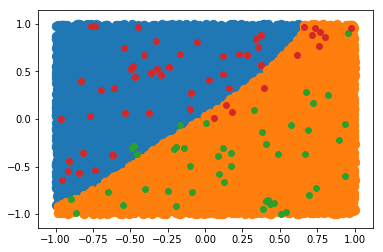

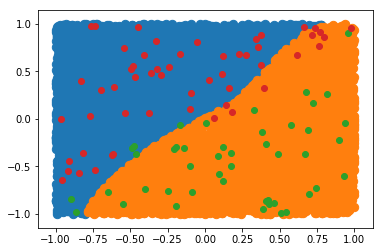

In [169]:
plot_decision_boundary(rbf1.predict)
plot_data(X, y)
plt.show()

plot_decision_boundary(rbf2.predict)
plot_data(X, y)
plt.show()

Looks like higher gamma causes more local variations (=more potential for overfitting?).

**Alternative 17C: Both Ein and Eout go up** seems to win.

# 18

In [172]:
times_Ein_zero = 0
times_Ein_positive = 0

for i in range(100):
    X_train = 2*np.random.rand(100, 3)-1
    X_train[:,0] = 1
    y_train = f(X_train)
    
    rbf = RegularRBF(K=9, gamma=1.5)
    rbf.fit(X_train, y_train)
    rbf_E_in = np.mean(rbf.predict(X_train) != y_train)
    
    if rbf_E_in == 0:
        times_Ein_zero += 1
    else:
        times_Ein_positive += 1
print(times_Ein_zero / (times_Ein_zero + times_Ein_positive))


0.01


Regular RBF with K=9 and gamma=1.5 achieves Ein=0 a very small percentage of the time.

**Alternative 18A: less than 10% of the time**

# Bayesian Priors

# 19

**Alternative 19B**: THe posterior increases linearly over [0,1]

# 20

Let g2(x) = 2, g(x) = 1, g1(x) = 0, out of sample dataset = (x=0, y=3).

In [179]:
y1 = 1
x1 = 0

def g1(x):
    return 0

def g2(x):
    return 2

def g(x):
    return 1/2 * (g1(x) + g2(x))

print("E_out (g1) =", (y1 - g1(x1))**2)
print("E_out (g2) =", (y1 - g2(x1))**2)
print("E_out (g) =", (y1 - g(x1))**2)
print("Smaller of E_out(g1) and E_out(g2) =", min((y1 - g1(x1))**2, (y1 - g2(x1))**2))
print("Average of E_out(g1) and E_out(g2) =", 0.5*((y1 - g1(x1))**2 + (y1 - g2(x1))**2))

E_out (g1) = 1
E_out (g2) = 1
E_out (g) = 0.0
Smaller of E_out(g1) and E_out(g2) = 1
Average of E_out(g1) and E_out(g2) = 1.0


a) False. E out(g) CAN be worse than Eout(g1)

b) False. E out(g) CAN be worse than smaller of Eout(g1) and Eout(g2)

c) True. **Alternative 20C** (using cauchy schwarz)

d) False. If g=f, then E_out(g) is zero while both E_out(g1) and E_out(g2) are positive.

e) False.